In [73]:
import pandas as pd

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt

In [74]:
# Definamos el "random_state" para que los resultados sean reproducibles:
random_state=42

Preprocesamiento de datos

In [75]:
# Carguemos los datos:
data_train = pd.read_csv('./Hospitalizacion_train_data.csv', header=0)
data_train

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [76]:
# datos de prueba, estos datos no tienen la variable objetivo porque la idea es medir como funciona el modelo para estos casos nuevos
data_test = pd.read_csv('./Hospitalizacion_test_data.csv', header=0)
data_test

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0


In [77]:
# Veamos la descripción del dataset:
data_train.describe(include='all')

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
count,318438.000000,318438.000000,318438,318438.000000,318438,318438.000000,318438,318438,318438,318325.000000,318438.000000,313906.000000,318438,318438,318438.000000,318438,318438.000000,318438
unique,NaN,NaN,7,NaN,3,NaN,5,6,6,NaN,NaN,NaN,3,3,NaN,10,NaN,11
top,NaN,NaN,a,NaN,X,NaN,gynecology,R,F,NaN,NaN,NaN,Trauma,Moderate,NaN,41-50,NaN,21-30
freq,NaN,NaN,143425,NaN,133336,NaN,249486,127947,112753,NaN,NaN,NaN,152261,175843,NaN,63749,NaN,87491
mean,159219.500000,18.318841,NaN,4.771717,NaN,3.197627,NaN,NaN,NaN,2.625807,65747.579472,7.251859,NaN,NaN,3.284099,NaN,4880.749392,NaN
std,91925.276847,8.633755,NaN,3.102535,NaN,1.168171,NaN,NaN,NaN,0.873146,37979.936440,4.745266,NaN,NaN,1.764061,NaN,1086.776254,NaN
min,1.000000,1.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,1800.000000,NaN
25%,79610.250000,11.000000,NaN,2.000000,NaN,2.000000,NaN,NaN,NaN,2.000000,32847.000000,4.000000,NaN,NaN,2.000000,NaN,4186.000000,NaN
50%,159219.500000,19.000000,NaN,5.000000,NaN,3.000000,NaN,NaN,NaN,3.000000,65724.500000,8.000000,NaN,NaN,3.000000,NaN,4741.000000,NaN
75%,238828.750000,26.000000,NaN,7.000000,NaN,4.000000,NaN,NaN,NaN,3.000000,98470.000000,8.000000,NaN,NaN,4.000000,NaN,5409.000000,NaN


In [78]:
# Veamos la descripción del dataset test:
data_test.describe(include='all')

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
count,137057.000000,137057.000000,137057,137057.000000,137057,137057.000000,137057,137057,137057,137022.000000,137057.000000,134900.000000,137057,137057,137057.000000,137057,137057.000000
unique,NaN,NaN,7,NaN,3,NaN,5,6,6,NaN,NaN,NaN,3,3,NaN,10,NaN
top,NaN,NaN,a,NaN,X,NaN,gynecology,R,F,NaN,NaN,NaN,Trauma,Moderate,NaN,41-50,NaN
freq,NaN,NaN,61305,NaN,57513,NaN,107202,54992,48717,NaN,NaN,NaN,65411,75722,NaN,27746,NaN
mean,386967.000000,18.343747,NaN,4.758692,NaN,3.192686,NaN,NaN,NaN,2.634489,65877.903515,7.243996,NaN,NaN,3.284531,NaN,4869.731097
std,39565.092259,8.634694,NaN,3.102245,NaN,1.164250,NaN,NaN,NaN,0.869295,37942.997623,4.790625,NaN,NaN,1.777270,NaN,1080.766723
min,318439.000000,1.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,3.000000,1.000000,NaN,NaN,0.000000,NaN,1800.000000
25%,352703.000000,11.000000,NaN,2.000000,NaN,2.000000,NaN,NaN,NaN,2.000000,32945.000000,4.000000,NaN,NaN,2.000000,NaN,4178.000000
50%,386967.000000,19.000000,NaN,5.000000,NaN,3.000000,NaN,NaN,NaN,3.000000,65786.000000,8.000000,NaN,NaN,3.000000,NaN,4731.000000
75%,421231.000000,26.000000,NaN,7.000000,NaN,4.000000,NaN,NaN,NaN,3.000000,98851.000000,8.000000,NaN,NaN,4.000000,NaN,5398.000000


In [79]:
# Verifiquemos si hay datos faltantes:
data_train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [80]:
data_test.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [81]:
# Se elimina las columnas de codigo del pacientes, id del caso y numero de visitantes debido a que no agregan valor al modelo.
data_train.drop(columns=['City_Code_Patient','Visitors with Patient','case_id'],inplace=True)
data_test.drop(columns=['City_Code_Patient','Visitors with Patient','case_id'],inplace=True)

In [82]:
# Eliminemos los registros de bed grade que esten vacios
data_train.dropna(inplace=True)

In [83]:
data_test.dropna(inplace=True)

In [84]:
#Comprobamos que no hay más datos nulos
data_train.isna().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
Type of Admission                    0
Severity of Illness                  0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [85]:
data_test.isna().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
Type of Admission                    0
Severity of Illness                  0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [86]:
#Se aplica ordinal enconding a las caracteristica de la lista
# pues usaremos modelos basados en arboles de decisión
columnas = ['Department', 'Stay','Type of Admission','Severity of Illness','Ward_Type','Ward_Facility_Code','Hospital_type_code','Hospital_region_code','Hospital_code',	'City_Code_Hospital','Bed Grade','Age']
for col in columnas:
  print(col)
  print({i: cat for i, cat in enumerate(data_train[col].astype('category').cat.categories)})
  print('')
  data_train.loc[:, col]= data_train[col].astype('category').cat.codes

Department
{0: 'TB & Chest disease', 1: 'anesthesia', 2: 'gynecology', 3: 'radiotherapy', 4: 'surgery'}

Stay
{0: '0-10', 1: '11-20', 2: '21-30', 3: '31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'}

Type of Admission
{0: 'Emergency', 1: 'Trauma', 2: 'Urgent'}

Severity of Illness
{0: 'Extreme', 1: 'Minor', 2: 'Moderate'}

Ward_Type
{0: 'P', 1: 'Q', 2: 'R', 3: 'S', 4: 'T', 5: 'U'}

Ward_Facility_Code
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F'}

Hospital_type_code
{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g'}

Hospital_region_code
{0: 'X', 1: 'Y', 2: 'Z'}

Hospital_code
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32}

City_Code_Hospital
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 9, 8: 10, 9: 11, 10: 13}

Bed Grade
{0: 1.0, 1

In [87]:
data_train

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Age,Admission_Deposit,Stay
0,7,2,2,2,3,3,2,5,1,31397,0,0,5,4911.0,0
1,1,2,4,2,2,3,3,5,1,31397,1,0,5,5954.0,4
2,9,4,0,0,2,1,3,4,1,31397,1,0,5,4745.0,3
3,25,1,1,1,2,3,2,3,1,31397,1,0,5,7272.0,4
4,25,1,1,1,2,3,3,3,1,31397,1,0,5,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,5,0,5,0,3,3,1,5,3,86499,0,2,4,4144.0,1
318434,23,0,0,0,2,1,1,4,3,325,2,2,8,6699.0,3
318435,6,0,3,0,3,2,2,5,3,125235,0,1,7,4235.0,1
318436,10,1,1,1,3,1,1,3,2,91081,1,1,1,3761.0,1


In [88]:
#Se aplica ordinal enconding a las caracteristica de la lista
# pues usaremos modelos basados en arboles de decisión
columnas = ['Department', 'Type of Admission','Severity of Illness','Ward_Type','Ward_Facility_Code','Hospital_type_code','Hospital_region_code','Hospital_code',	'City_Code_Hospital','Bed Grade','Age']
for col in columnas:
  print(col)
  print({i: cat for i, cat in enumerate(data_test[col].astype('category').cat.categories)})
  print('')
  data_test.loc[:, col]= data_test[col].astype('category').cat.codes

Department
{0: 'TB & Chest disease', 1: 'anesthesia', 2: 'gynecology', 3: 'radiotherapy', 4: 'surgery'}

Type of Admission
{0: 'Emergency', 1: 'Trauma', 2: 'Urgent'}

Severity of Illness
{0: 'Extreme', 1: 'Minor', 2: 'Moderate'}

Ward_Type
{0: 'P', 1: 'Q', 2: 'R', 3: 'S', 4: 'T', 5: 'U'}

Ward_Facility_Code
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F'}

Hospital_type_code
{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g'}

Hospital_region_code
{0: 'X', 1: 'Y', 2: 'Z'}

Hospital_code
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32}

City_Code_Hospital
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 9, 8: 10, 9: 11, 10: 13}

Bed Grade
{0: 1.0, 1: 2.0, 2: 3.0, 3: 4.0}

Age
{0: '0-10', 1: '11-20', 2: '21-30', 3: '31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100'}



In [89]:
data_test

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Age,Admission_Deposit
0,20,2,2,2,3,2,3,0,1,17006,0,2,7,3095.0
1,28,0,3,0,2,2,3,5,1,17006,1,2,7,4018.0
2,25,1,1,1,3,2,1,3,3,17006,0,2,7,4492.0
3,5,0,5,0,3,2,1,5,1,17006,1,2,7,4173.0
4,27,1,9,0,2,2,2,5,1,17006,1,2,7,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,10,1,1,1,4,1,1,3,2,41160,0,1,4,6313.0
137053,24,4,0,0,2,3,2,4,3,30985,0,2,0,3510.0
137054,29,2,2,2,2,1,2,0,3,81811,2,1,0,7190.0
137055,4,0,0,0,2,1,2,4,3,57021,1,1,4,5435.0


In [90]:
#se convierte la columna admission deposit en un entero
data_train['Admission_Deposit'] = data_train['Admission_Deposit'].astype('int')
data_test['Admission_Deposit'] = data_test['Admission_Deposit'].astype('int')

In [91]:
#dataset final
data_train

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Age,Admission_Deposit,Stay
0,7,2,2,2,3,3,2,5,1,31397,0,0,5,4911,0
1,1,2,4,2,2,3,3,5,1,31397,1,0,5,5954,4
2,9,4,0,0,2,1,3,4,1,31397,1,0,5,4745,3
3,25,1,1,1,2,3,2,3,1,31397,1,0,5,7272,4
4,25,1,1,1,2,3,3,3,1,31397,1,0,5,5558,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,5,0,5,0,3,3,1,5,3,86499,0,2,4,4144,1
318434,23,0,0,0,2,1,1,4,3,325,2,2,8,6699,3
318435,6,0,3,0,3,2,2,5,3,125235,0,1,7,4235,1
318436,10,1,1,1,3,1,1,3,2,91081,1,1,1,3761,1


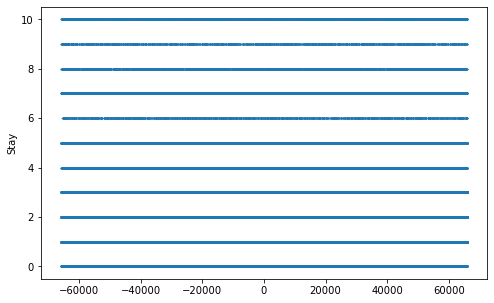

In [92]:
# Visualicemos los datos reducidos a dos dimensiones:

data_train.reset_index(drop=True, inplace=True)

pca = PCA(1)
z = pca.fit_transform(data_train.drop(columns= 'Stay'))

fig, ax = plt.subplots()
ax.scatter(z, data_train['Stay'], s=0.5)
ax.set_ylabel('Stay')
fig.set_size_inches(1.6*5, 5)

# Modelo de Regresión

In [93]:
# Separemos los datos en conjuntos de entrenamiento (70 %) y prueba (30 %) lo tomamos todo del conjunto de 
#data_train debido a que data_test no tiene la columna Stay:

X_train, X_test, y_train, y_test = train_test_split(
    data_train.drop(columns='Stay'),
    data_train['Stay'],
    test_size=0.3,
    random_state=random_state
)

In [94]:
# Defineamos los modelos base (un random forest y un gradient boosting):
rf_base = RandomForestRegressor(random_state=random_state)
gb_base = GradientBoostingRegressor(random_state=random_state)

In [95]:
# Definamos la malla de parámetros sobre la que haremos la búsqueda:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': list(range(6, 15)),
    'min_samples_leaf': [1, 10, 50]
}

In [96]:
# Definamos nuestros modelo mediante GridSearchCV:
rf = GridSearchCV(rf_base, cv=3, param_grid=param_grid)
gb = GridSearchCV(gb_base, cv=3, param_grid=param_grid)

In [102]:
%%time
#entrenar el Random Forest
rf.fit(X_train,y_train)

Wall time: 58min 13s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [1, 10, 50],
                         'n_estimators': [50, 100]})

In [103]:
# Obtengamos los mejores hiperparámetros encontrados para el random forest:
rf.best_params_

{'max_depth': 14, 'min_samples_leaf': 10, 'n_estimators': 100}

In [97]:
%%time
#entrenar el modelo en Gradient Bosting
gb.fit(X_train,y_train)

Wall time: 1h 34min 23s


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [1, 10, 50],
                         'n_estimators': [50, 100]})

In [98]:
# Obtengamos los mejores hiperparámetros encontrados para el gradient boosting:
gb.best_params_

{'max_depth': 9, 'min_samples_leaf': 50, 'n_estimators': 100}

In [104]:
# Obtengamos el R^2 y el MAE de entrenamiento para cada modelo:
for model in (rf, gb):
    print(f"Model: {'Random Forest' if model == rf else 'Gradient Boosting'}")
    print(f'R^2: {model.score(X_train, y_train)}')
    print(f'MAE: {mean_absolute_error(y_train, model.predict(X_train))}')
    print('\n')

Model: Random Forest
R^2: 0.2535232449766175
MAE: 1.369743488031037


Model: Gradient Boosting
R^2: 0.21640059619697616
MAE: 1.401557933264039




In [105]:
# Obtengamos el R^2 y el MAE de prueba para cada modelo:
for model in (rf, gb):
    print(f"Model: {'Random Forest' if model == rf else 'Gradient Boosting'}")
    print(f'R^2: {model.score(X_test, y_test)}')
    print(f'MAE: {mean_absolute_error(y_test, model.predict(X_test))}')
    print('\n')

Model: Random Forest
R^2: 0.13423334001028964
MAE: 1.476689303267334


Model: Gradient Boosting
R^2: 0.14802453079097566
MAE: 1.4632840192708443




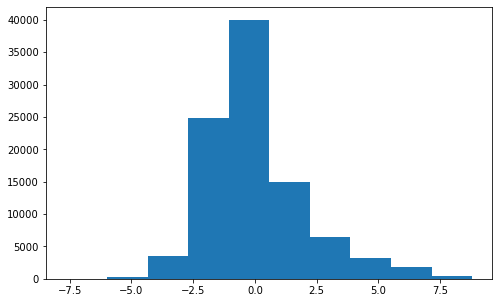

In [106]:
# Grafiquemos un histograma del error de predicción con el gradient boosting:
fig, ax = plt.subplots()
ax.hist(y_test - gb.predict(X_test))
fig.set_size_inches(1.6*5, 5)

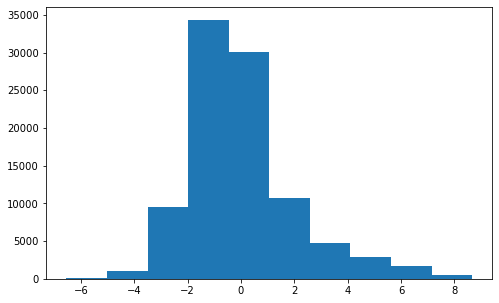

In [107]:
# Grafiquemos un histograma del error de predicción con el Random Forets:
fig, ax = plt.subplots()
ax.hist(y_test - rf.predict(X_test))
fig.set_size_inches(1.6*5, 5)

In [108]:
# Veamos los datos junto con la predicción:
pd.concat([
    data_train.drop(columns='Stay').reset_index(drop=True),
    data_train['Stay'].reset_index(drop=True),
    pd.DataFrame({'rf_predicted_Stay': rf.predict(data_train.drop(columns='Stay'))}),
    pd.DataFrame({'gb_predicted_Stay': gb.predict(data_train.drop(columns='Stay'))})
], axis=1)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Age,Admission_Deposit,Stay,rf_predicted_Stay,gb_predicted_Stay
0,7,2,2,2,3,3,2,5,1,31397,0,0,5,4911,0,2.925570,2.685726
1,1,2,4,2,2,3,3,5,1,31397,1,0,5,5954,4,4.108879,3.877178
2,9,4,0,0,2,1,3,4,1,31397,1,0,5,4745,3,2.998665,2.688100
3,25,1,1,1,2,3,2,3,1,31397,1,0,5,7272,4,3.858435,4.119627
4,25,1,1,1,2,3,3,3,1,31397,1,0,5,5558,4,3.954352,3.970603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318320,5,0,5,0,3,3,1,5,3,86499,0,2,4,4144,1,2.564428,2.396378
318321,23,0,0,0,2,1,1,4,3,325,2,2,8,6699,3,2.515215,2.455167
318322,6,0,3,0,3,2,2,5,3,125235,0,1,7,4235,1,2.209127,2.698980
318323,10,1,1,1,3,1,1,3,2,91081,1,1,1,3761,1,2.590401,2.288874
